<a href="https://colab.research.google.com/github/jgu13/unet/blob/master/Ass4_reproducibility_project_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ass4 Reproducibility miniproject
Cloned repo from [zhixuhao's](https://github.com/zhixuhao) implementation of [unet](https://github.com/jgu13/unet)

In [ ]:
!pip install imagecodecs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 21.8 MB/s eta 0:00:00


In [13]:
# Uncomment if not yet cloned repo
!if [ -d 'unet' ]; then rm -rf unet; fi
!git clone https://github.com/jgu13/unet

Cloning into 'unet'...
remote: Enumerating objects: 2194, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 2194 (delta 14), reused 38 (delta 10), pack-reused 2150
Receiving objects: 100% (2194/2194), 237.42 MiB | 33.03 MiB/s, done.
Resolving deltas: 100% (538/538), done.
Checking out files: 100% (2078/2078), done.


In [15]:
import numpy as np
from unet.data import *
from unet.model import *
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Experiment1: Segmentation of neuronal structures in electron microscopic recordings

The training data is a set of
30 images (512x512 pixels) from serial section transmission electron microscopy
of the Drosophila first instar larva ventral nerve cord (VNC). Each image comes with a corresponding fully annotated ground truth segmentation map for cells
(white) and membranes (black).

## Load train, test images, and apply image augmentation

In [ ]:
train_path = os.path.join(os.getcwd(), 'unet', 'data', 'membrane', 'train')
test_path = os.path.join(os.getcwd(), 'unet', 'data', 'membrane', 'test')

#image augmentation parameters passed to image generator as a dict. 
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

train_gen = trainGenerator(2,train_path,'image','label',data_gen_args,save_to_dir = None)
testGen = testGenerator(test_path)


## Build and fit a unet model 
The model is trained for 5 epochs.

Accuracy close to 96%.

Loss function for the training is basically just a binary crossentropy.

In [ ]:
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(train_gen,steps_per_epoch=1000,epochs=5,callbacks=[model_checkpoint])

## Test images
Save test results to data/membrane/reproduced_test

In [ ]:
reproduced_test_path = os.path.join(os.path.dirname(test_path), 'reproduced_test')
if not os.path.isdir(reproduced_test_path):
  os.makedirs(reproduced_test_path)

testGene = testGenerator(test_path)
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult(reproduced_test_path,results)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_46 (Conv2D)             (None, 256, 256, 64  640         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_47 (Conv2D)             (None, 256, 256, 64  36928       ['conv2d_46[0][0]']              
                                )                                                           

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


30/30 [==============================] - 59s 2s/step


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

## Helper functions

In [10]:
# helper function for data visualization
def visualize(image_paths, cmap=None):
    """PLot images in one row."""
    n = len(image_paths)
    plt.figure(figsize=(16, 5))
    for i, (name, image_path) in enumerate(image_paths.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        # plt.title(' '.join(name.split('_')).title())
        plt.title(name)
        image=mpimg.imread(image_path)
        plt.imshow(image, cmap=cmap)
    plt.show()

## Visualize image augmentation
Save augmented images to data/membrane/train/reproduced_aug.
Note that masks are augmented together with images.

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.


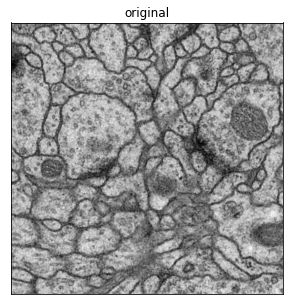

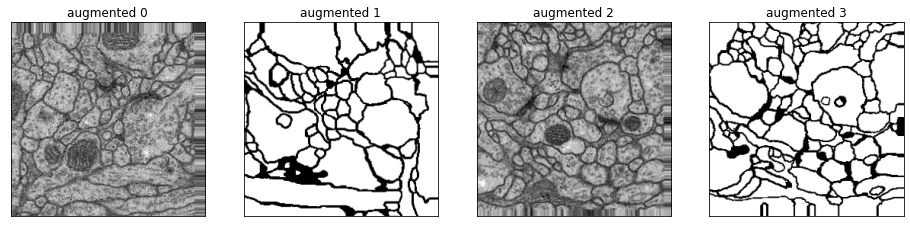

In [ ]:
reproduced_aug_path = os.path.join(os.getcwd(), 'unet', 'data', 'membrane', 'train', 'reproduced_aug')
if not os.path.isdir(reproduced_test_path):
  os.makedirs(reproduced_aug_path)

myGen = trainGenerator(20, train_path,'image','label',data_gen_args,save_to_dir = reproduced_aug_path)
#you will see 60 transformed images and their masks in data/membrane/train/reproduced_aug
num_batch = 3
for i,batch in enumerate(myGen):
    if(i >= num_batch):
        break

orig_image_path = os.path.join(train_path, 'image', '0.png')
aug_image_paths = [os.path.join(reproduced_aug_path, name) for name in os.listdir(reproduced_aug_path)[:4]]
aug_image_names = ['augmented '+str(i) for i in range(len(aug_image_paths))]
orig_image_paths_dict = {'original': orig_image_path}
aug_image_paths_dict = {aug_image_names[i] : aug_image_paths[i] for i in range(len(aug_image_names))}

visualize(orig_image_paths_dict, cmap='gray')
visualize(aug_image_paths_dict, cmap='gray')


## Visualize segmentation results

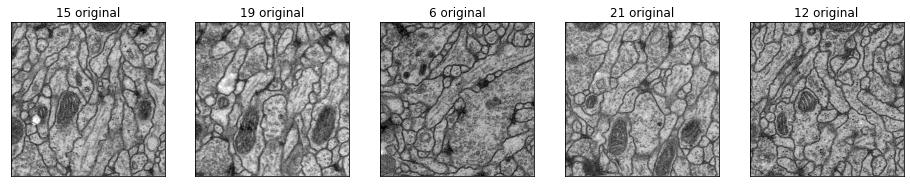

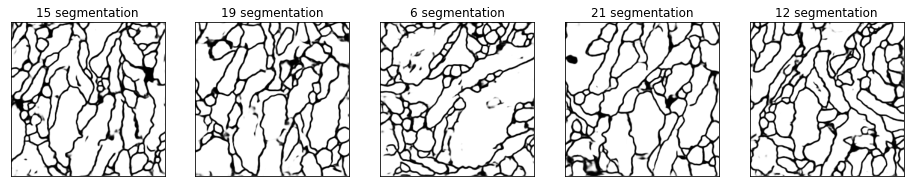

In [ ]:
# display segmentation results of 5 membrane pictures  
np.random.seed(1234) # reset the seed every time before generating random int
selected = np.random.randint(low=0, high=29, size=5)
image_orig_paths = [os.path.join(test_path, str(i)+'.png') for i in selected]
image_orig_names = [str(i)+' original' for i in selected]
image_seg_paths = [os.path.join(reproduced_test_path, str(i)+'_predict.png') for i in selected]
image_seg_names = [str(i)+' segmentation' for i in selected]

orig_image_paths = {image_orig_names[i] : image_orig_paths[i] for i in range(len(image_orig_names))}
seg_image_paths = {image_seg_names[i] : image_seg_paths[i] for i in range(len(image_seg_names))}
visualize(orig_image_paths, cmap='gray')
visualize(seg_image_paths, cmap='gray')

#Experiment2: 
The paper also applied the u-net to a cell segmentation task in light microscopic images. This segmenation task is part of the ISBI cell tracking challenge 2014 and 2015.
Here we performed experiments on the second data set “DIC-HeLa”3. These are HeLa cells on a flat glass recorded by differential interference contrast (DIC) microscopy.

In [6]:
train_path = os.path.join(os.getcwd(), 'unet', 'DIC-C2DH-HeLa', 'train')
test_path = os.path.join(os.getcwd(), 'unet', 'DIC-C2DH-HeLa', 'test')

#image augmentation parameters passed to image generator as a dict. 
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

train_gen = trainGenerator(batch_size=1,  # should we need batch_size > 1, add argument num_class=55
                           train_path=train_path,
                           image_folder='img',
                           mask_folder='segmentation',
                           aug_dict=data_gen_args,
                           image_color_mode = "grayscale",
                           mask_color_mode = 'rgb',image_save_prefix = "image",mask_save_prefix = "mask",
                           flag_multi_class = True,save_to_dir = None,target_size = (256,256),seed = 1)

### Build and fit a baseline unet model

In [7]:
model = unet()
model_checkpoint = ModelCheckpoint('unet_dic.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(train_gen,steps_per_epoch=10,epochs=1,callbacks=[model_checkpoint])

2022-04-23 04:46:06.237293: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-23 04:46:06.237413: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (deeplearning-1-vm): /proc/driver/nvidia/version does not exist
2022-04-23 04:46:06.240215: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Found 64 images belonging to 1 classes.
Found 64 images belonging to 1 classes.


2022-04-23 04:46:12.123205: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301989888 exceeds 10% of free system memory.
2022-04-23 04:46:12.723087: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301989888 exceeds 10% of free system memory.


 1/10 [==>...........................] - ETA: 1:31 - loss: 0.7086 - accuracy: 0.7879

2022-04-23 04:46:20.550396: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301989888 exceeds 10% of free system memory.
2022-04-23 04:46:21.144959: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301989888 exceeds 10% of free system memory.


 2/10 [=====>........................] - ETA: 1:07 - loss: 0.7016 - accuracy: 0.8778

2022-04-23 04:46:28.954759: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301989888 exceeds 10% of free system memory.


10/10 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.9529
Epoch 1: loss improved from inf to 0.69478, saving model to unet_dic.hdf5
10/10 [==============================] - 89s 9s/step - loss: 0.6948 - accuracy: 0.9529


### Test images

In [8]:
reproduced_test_path = os.path.join(os.path.dirname(train_path), 'reproduced_test')
if not os.path.isdir(reproduced_test_path):
  os.makedirs(reproduced_test_path)

testGen=testGenerator(test_path, num_image_indices=range(64,84), image_prefix="t0",image_suffix='.tif')
model = unet()
model.load_weights("unet_dic.hdf5")
results = model.predict_generator(testGen,20,verbose=1) # 20 test images
saveResult(reproduced_test_path,results,test_ids=range(64,84),flag_multi_class=True,num_class=55)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 256, 256, 64  640         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_25 (Conv2D)             (None, 256, 256, 64  36928       ['conv2d_24[0][0]']              
                                )                                                           

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


20/20 [==============================] - 39s 2s/step


/home/jupyter/unet/data.py:134: UserWarning: /home/jupyter/unet/DIC-C2DH-HeLa/reproduced_test/64_predict.tif is a low contrast image
  io.imsave(os.path.join(save_path,image_name),img)
/home/jupyter/unet/data.py:134: UserWarning: /home/jupyter/unet/DIC-C2DH-HeLa/reproduced_test/65_predict.tif is a low contrast image
  io.imsave(os.path.join(save_path,image_name),img)
/home/jupyter/unet/data.py:134: UserWarning: /home/jupyter/unet/DIC-C2DH-HeLa/reproduced_test/66_predict.tif is a low contrast image
  io.imsave(os.path.join(save_path,image_name),img)
/home/jupyter/unet/data.py:134: UserWarning: /home/jupyter/unet/DIC-C2DH-HeLa/reproduced_test/67_predict.tif is a low contrast image
  io.imsave(os.path.join(save_path,image_name),img)
/home/jupyter/unet/data.py:134: UserWarning: /home/jupyter/unet/DIC-C2DH-HeLa/reproduced_test/68_predict.tif is a low contrast image
  io.imsave(os.path.join(save_path,image_name),img)
/home/jupyter/unet/data.py:134: UserWarning: /home/jupyter/unet/DIC-C2DH-He

### Visualize augmentation

Saved augmented images and corresponding masks into DIC-C2D-HeLa/reproduced_aug/

In [ ]:
reproduced_aug_path = os.path.join(os.path.dirname(train_path), 'reproduced_aug')
if not os.path.isdir(reproduced_aug_path):
  os.makedirs(reproduced_aug_path)

augGen = trainGenerator(batch_size=2,
                         train_path=train_path,
                         image_folder='img',
                         mask_folder='segmentation',
                         aug_dict=data_gen_args,
                         image_color_mode = "grayscale",
                         mask_color_mode = 'rgb',image_save_prefix  = "image",mask_save_prefix  = "mask",
                         flag_multi_class = True,save_to_dir = reproduced_aug_path, target_size = (256,256),seed = 1)
#you will see 60 transformed images and their masks in data/membrane/train/reproduced_aug
num_batch = 4
for i,batch in enumerate(augGen):
    if(i >= num_batch):
        break
# orig_image_path = os.path.join(train_path, 'img', 't000.tif')
# aug_image_paths = [os.path.join(reproduced_aug_path, name) for name in ['image_0_7331234.png','mask_0_7331234.png']]
# aug_image_names = ['augmented '+str(i) for i in range(len(aug_image_paths))]
# orig_image_paths_dict = {'original': orig_image_path}
# aug_image_paths_dict = {aug_image_names[i] : aug_image_paths[i] for i in range(len(aug_image_names))}

# visualize(orig_image_paths_dict)
# visualize(aug_image_paths_dict)

Found 64 images belonging to 1 classes.
Found 64 images belonging to 1 classes.


### Visualize segmentation results

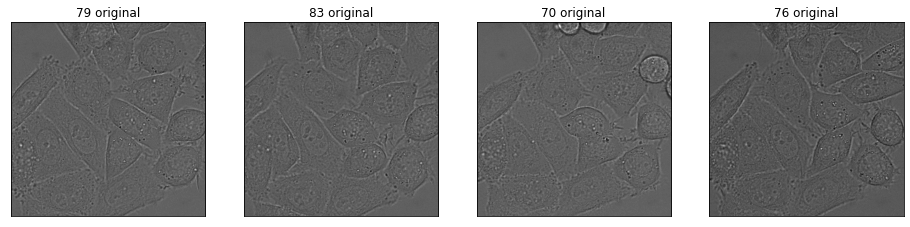

UnidentifiedImageError: ignored

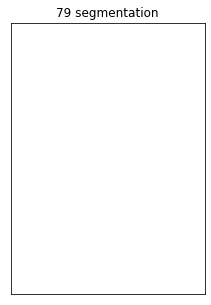

In [11]:
# display segmentation results of 5 membrane pictures  
np.random.seed(1234) # reset the seed every time before generating random int
selected = np.random.randint(low=64, high=84, size=5)
image_orig_paths = [os.path.join(test_path, "".join(("t0",str(i),".tif"))) for i in selected]
image_orig_names = [str(i)+' original' for i in selected]
image_seg_paths = [os.path.join(reproduced_test_path, str(i)+'_predict.tif') for i in selected]
image_seg_names = [str(i)+' segmentation' for i in selected]

orig_image_paths = {image_orig_names[i] : image_orig_paths[i] for i in range(len(image_orig_names))}
seg_image_paths = {image_seg_names[i] : image_seg_paths[i] for i in range(len(image_seg_names))}
visualize(orig_image_paths,cmap='gray')
visualize(seg_image_paths)

## Effects of hyperparameters on model performance

1. Investigate the effect of more extensive image augmentations on model performance. 

In [8]:
train_path = os.path.join(os.getcwd(), 'unet', 'data', 'membrane', 'train')
test_path = os.path.join(os.getcwd(), 'unet', 'data', 'membrane', 'test')

data_gen_more_args = dict(samplewise_center=True, # set each sample mean to 0
                      samplewise_std_normalization=True, # divide each input by its std
                    rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    brightness_range=(0.1, 1.0),
                    shear_range=0.05,
                    zoom_range=0.05,
                    fill_mode='nearest',
                    horizontal_flip=True,
                    vertical_flip=True,
                    rescale=0.05)

train_gen = trainGenerator(2,train_path,'image','label',data_gen_more_args,save_to_dir = None)
testGen = testGenerator(test_path)

### Build and fit a unet model

To save computational resource, we train for 100 epochs to see if more augmentations would affect the performance significantly.

In [9]:
more_aug_model = unet()
more_aug_model_checkpoint = ModelCheckpoint('more_aug_unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
more_aug_model.fit_generator(train_gen,steps_per_epoch=100,epochs=5,callbacks=[more_aug_model_checkpoint])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 256, 256, 64  640         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_25 (Conv2D)             (None, 256, 256, 64  36928       ['conv2d_24[0][0]']              
                                )                                                           

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/5


2022-04-23 00:37:08.018220: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301989888 exceeds 10% of free system memory.
2022-04-23 00:37:18.246480: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301989888 exceeds 10% of free system memory.


  1/100 [..............................] - ETA: 31:27 - loss: 0.6867 - accuracy: 0.9981

2022-04-23 00:37:24.583574: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301989888 exceeds 10% of free system memory.
2022-04-23 00:37:34.719771: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301989888 exceeds 10% of free system memory.


  2/100 [..............................] - ETA: 27:01 - loss: 0.6446 - accuracy: 0.9991

2022-04-23 00:37:41.060062: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301989888 exceeds 10% of free system memory.


100/100 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 1.0000 
Epoch 1: loss improved from inf to 0.01676, saving model to more_aug_unet_membrane.hdf5
100/100 [==============================] - 1661s 17s/step - loss: 0.0168 - accuracy: 1.0000
Epoch 2/5
100/100 [==============================] - ETA: 0s - loss: 9.5971e-37 - accuracy: 1.0000 
Epoch 2: loss improved from 0.01676 to 0.00000, saving model to more_aug_unet_membrane.hdf5
100/100 [==============================] - 1662s 17s/step - loss: 9.5971e-37 - accuracy: 1.0000
Epoch 3/5
100/100 [==============================] - ETA: 0s - loss: 2.7242e-36 - accuracy: 1.0000 
Epoch 3: loss did not improve from 0.00000
100/100 [==============================] - 1686s 17s/step - loss: 2.7242e-36 - accuracy: 1.0000
Epoch 4/5
100/100 [==============================] - ETA: 0s - loss: 1.5129e-35 - accuracy: 1.0000 
Epoch 4: loss did not improve from 0.00000
100/100 [==============================] - 1664s 17s/step - loss

### Test images

Test on serial section transmission electron microscopy of the Drosophila first instar larva ventral nerve cord (VNC)

In [11]:
reproduced_test_path = os.path.join(os.path.dirname(test_path), 'reproduced_more_aug_test')
if not os.path.isdir(reproduced_test_path):
  os.makedirs(reproduced_test_path)

testGene = testGenerator(test_path)
model = unet()
model.load_weights("more_aug_unet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult(reproduced_test_path,results,test_ids=range(30))

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_72 (Conv2D)             (None, 256, 256, 64  640         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_73 (Conv2D)             (None, 256, 256, 64  36928       ['conv2d_72[0][0]']              
                                )                                                           

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


30/30 [==============================] - 58s 2s/step


/home/jupyter/unet/data.py:128: UserWarning: /home/jupyter/unet/data/membrane/reproduced_more_aug_test/0_predict.tif is a low contrast image
  io.imsave(os.path.join(save_path,image_name),img)
/home/jupyter/unet/data.py:128: UserWarning: /home/jupyter/unet/data/membrane/reproduced_more_aug_test/1_predict.tif is a low contrast image
  io.imsave(os.path.join(save_path,image_name),img)
/home/jupyter/unet/data.py:128: UserWarning: /home/jupyter/unet/data/membrane/reproduced_more_aug_test/2_predict.tif is a low contrast image
  io.imsave(os.path.join(save_path,image_name),img)
/home/jupyter/unet/data.py:128: UserWarning: /home/jupyter/unet/data/membrane/reproduced_more_aug_test/3_predict.tif is a low contrast image
  io.imsave(os.path.join(save_path,image_name),img)
/home/jupyter/unet/data.py:128: UserWarning: /home/jupyter/unet/data/membrane/reproduced_more_aug_test/4_predict.tif is a low contrast image
  io.imsave(os.path.join(save_path,image_name),img)
/home/jupyter/unet/data.py:128: Use

### Visualize augmentations

Reproduced augmentations are saved to train/reproduced_more_aug/

Example augmentations to image 0.png are shown here.

In [ ]:
reproduced_more_aug_path = os.path.join(os.path.dirname(train_path), 'reproduced_more_aug')
if not os.path.isdir(reproduced_test_path):
  os.makedirs(reproduced_aug_path)

myGen = trainGenerator(20, train_path,'image','label',data_gen_args,save_to_dir = reproduced_more_aug_path)
#you will see 60 transformed images and their masks in data/membrane/train/reproduced_aug
num_batch = 3
for i,batch in enumerate(myGen):
    if(i >= num_batch):
        break

orig_image_path = os.path.join(train_path, 'image', '0.png')
aug_image_paths = [os.path.join(reproduced_aug_path, name) for name in os.listdir(reproduced_more_aug_path)[:4]]
aug_image_names = ['augmented '+str(i) for i in range(len(aug_image_paths))]
orig_image_paths_dict = {'original': orig_image_path}
aug_image_paths_dict = {aug_image_names[i] : aug_image_paths[i] for i in range(len(aug_image_names))}

visualize(orig_image_paths_dict, cmap='gray')
visualize(aug_image_paths_dict, cmap='gray')

### Visualize segmentation results

In [ ]:
# display segmentation results of 5 membrane pictures  
np.random.seed(1234) # reset the seed every time before generating random int
selected = np.random.randint(low=0, high=29, size=5)
image_orig_paths = [os.path.join(test_path, str(i)+'.png') for i in selected]
image_orig_names = [str(i)+' original' for i in selected]
image_seg_paths = [os.path.join(reproduced_test_path, str(i)+'_predict.png') for i in selected]
image_seg_names = [str(i)+' segmentation' for i in selected]

orig_image_paths = {image_orig_names[i] : image_orig_paths[i] for i in range(len(image_orig_names))}
seg_image_paths = {image_seg_names[i] : image_seg_paths[i] for i in range(len(image_seg_names))}
visualize(orig_image_paths, cmap='gray')
visualize(seg_image_paths, cmap='gray')

## Ablation study
1. Remove concatnation
  
   1.1 accuracy decreased to 89%

2. No expansive path

   2.1 accuracy decreased to 79%

In [ ]:
# Baseline
bsl_model = unet()
bsl_model_checkpoint = ModelCheckpoint('baseline_model.hdf5', monitor='loss',verbose=1,save_best_only=True)
bsl_model.fit_generator(train_gen,steps_per_epoch=1000,epochs=5,callbacks=[bsl_model_checkpoint])

In [ ]:
# Remove concatenation
no_concat_model = unet(concate=False)
# Train modified model
no_concat_model_checkpoint = ModelCheckpoint('no_concate_unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
no_concat_model.fit_generator(train_gen,steps_per_epoch=1000,epochs=5,callbacks=[no_concat_model_checkpoint])

2022-04-21 09:19:00.728254: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-21 09:19:00.728304: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (deeplearning-1-vm): /proc/driver/nvidia/version does not exist
2022-04-21 09:19:00.728861: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                             

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Epoch 1/5


2022-04-21 09:19:07.698290: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 150994944 exceeds 10% of free system memory.
2022-04-21 09:19:08.009268: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 150994944 exceeds 10% of free system memory.
2022-04-21 09:19:08.167170: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 150994944 exceeds 10% of free system memory.
2022-04-21 09:19:08.592923: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 150994944 exceeds 10% of free system memory.
2022-04-21 09:19:08.867258: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 150994944 exceeds 10% of free system memory.


1000/1000 [==============================] - ETA: 0s - loss: 0.4121 - accuracy: 0.7965 
Epoch 1: loss improved from inf to 0.41206, saving model to no_concate_unet_membrane.hdf5
1000/1000 [==============================] - 13146s 13s/step - loss: 0.4121 - accuracy: 0.7965
Epoch 2/5
1000/1000 [==============================] - ETA: 0s - loss: 0.3227 - accuracy: 0.8376 
Epoch 2: loss improved from 0.41206 to 0.32272, saving model to no_concate_unet_membrane.hdf5
1000/1000 [==============================] - 13382s 13s/step - loss: 0.3227 - accuracy: 0.8376
Epoch 3/5
1000/1000 [==============================] - ETA: 0s - loss: 0.2902 - accuracy: 0.8624 
Epoch 3: loss improved from 0.32272 to 0.29016, saving model to no_concate_unet_membrane.hdf5
1000/1000 [==============================] - 13381s 13s/step - loss: 0.2902 - accuracy: 0.8624
Epoch 4/5
1000/1000 [==============================] - ETA: 0s - loss: 0.2661 - accuracy: 0.8800 
Epoch 4: loss improved from 0.29016 to 0.26609, saving 

In [ ]:
# Remove expansive paths
no_exp_path_model = unet(expansive_path=False)
# Train modified model
no_exp_path_model_checkpoint = ModelCheckpoint('no_exp_path_unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
no_exp_path_model.fit_generator(train_gen,steps_per_epoch=1000,epochs=5,callbacks=[no_exp_path_model_checkpoint])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_35 (Conv2D)          (None, 256, 256, 64)      640       
                                                                 
 conv2d_36 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_37 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_38 (Conv2D)          (None, 128, 128, 128)     147584    
                                                           

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


1000/1000 [==============================] - ETA: 0s - loss: 0.4791 - accuracy: 0.7811
Epoch 1: loss improved from inf to 0.47906, saving model to no_exp_path_unet_membrane.hdf5
1000/1000 [==============================] - 6742s 7s/step - loss: 0.4791 - accuracy: 0.7811
Epoch 2/5
1000/1000 [==============================] - ETA: 0s - loss: 0.4414 - accuracy: 0.7873
Epoch 2: loss improved from 0.47906 to 0.44137, saving model to no_exp_path_unet_membrane.hdf5
1000/1000 [==============================] - 6603s 7s/step - loss: 0.4414 - accuracy: 0.7873
Epoch 3/5
1000/1000 [==============================] - ETA: 0s - loss: 0.4341 - accuracy: 0.7903
Epoch 3: loss improved from 0.44137 to 0.43408, saving model to no_exp_path_unet_membrane.hdf5
1000/1000 [==============================] - 6539s 7s/step - loss: 0.4341 - accuracy: 0.7903
Epoch 4/5
1000/1000 [==============================] - ETA: 0s - loss: 0.4308 - accuracy: 0.7916
Epoch 4: loss improved from 0.43408 to 0.43081, saving model t